# Diabetes - EDA 
### Cel biznesowy: 
Projekt służy zbadaniu czynników zdrowotnych i pozazdrowotnych mających wpływ na ryzyko wystąpienia cukrzycy. Strategicznym celem jest zbudowanie predykcji pozwalających trafnie określić, na podstawie dostępnych cech, czy u danej osoby może wystąpić choroba.
### Technologie: 
Metody nazdorowanego uczenia maszynowego.

### Zmienna celu: 
Diabetes_012: 0 - brak cukrzycy, 1 - podejrzenie lub stan przedcukrzycowy oraz cukrzyca ciążowa, 2 - chory

### Badane cechy:
1. **HighBP**: 
    - 0 - brak wysokiego ciśnienia krwi (lub brak świadomości)
    - 1 - wysokie ciśnienie krwi

2. **HighChol**: 
    - 0 - brak wysokiego cholesterolu (lub brak świadomości)
    - 1 - wysoki cholesterol

3. **CholCheck**: 
    - 0 - brak badania cholesterolu w ciągu ostatnich 5 lat
    - 1 - badanie cholesterolu w ciągu ostatnich 5 lat
       
4. **BMI**: Body Mass Index zaokrąglony do INT

5. **Smoker**: 
    - 0 - wypalił(a) mniej niż 100 papierosów w życiu (niepalący)
    - 1 - więcej niż 100 papierosów

6. **Stroke**: 
    - 0 - nie miał(a) udaru mózgu
    - 1 - był udar

7. **HeartDiseaseorAttack**: 
    - 0 - nie miał(a) choroby wieńcowej ani zawału serca
    - 1 - wystąpiła conajmniej jedna z tych przypadłości

8. **PhysActivity**: 
    - 0 - nie uprawiał(a) sportu przez ostatnie 30 dni (nie licząc pracy)
    - 1 - uprawiał(a) sport

9. **Fruits**: 
    - 0 - spożywa owoce mniej niż raz dziennie
    - 1 - conajmiej raz dziennie

10. **Veggies**: 
    - 0 - spożywa warzywa mniej niż raz dziennie
    - 1 - conajmiej raz dziennie

11. **HvyAlcoholConsumption**: 
    - 0 - spożywa mniej niż 14 drinków tygodniowo (mężczyźni) lub mniej niż 7 tygodniowo (kobiety)
    - 1 - spożywa więcej alkoholu

12. **AnyHealthcare**: 
    - 0 - nie posiada żadnej formy ubezpieczenia zdrowotnego
    - 1 - posiada ubezpieczenie zdrowotne, korzysta z prywatnej organizacji ochrony zdrowia itp.

13. **NoDocbcCost**: Czy zdarzyła się sytuacja w ciągu ostatnich 12 miesięcy, w której osoba potrzebowała udać się do lekarza, ale nie mogła ze względu na wysokie koszty?
    - 0 - nie
    - 1 - tak

14. **GenHlth**: Subiektywna ocena ogólnego zdrowia w skali 1-5
    - 1 - świetnie, 
    - 2 - bardzo dobrze, 
    - 3 - dobrze, 
    - 4 - średnio, 
    - 5 - słabo

15. **MentHlth**: Na przestrzeni ostatnich 30 dni, ile dni było takich, że osoba oceniłaby swoje zdrowie psychiczne negatywnie (włączając stres, depresję, problemy emocjonalne)?
    - 0 - dobre zdrowie psychiczne
    - ...
    - 30 - bardzo złe zdrowie psychiczne

16. **PhysHlth**: Na przestrzeni ostatnich 30 dni, ile dni było takich, że osoba oceniłaby swoje zdrowie fizyczne negatywnie (włączając fizyczne choroby, wypadki)?
    - 0 - dobre zdrowie fizyczne
    - ...
    - 30 - bardzo złe zdrowie fizyczne

17. **DiffWalk**: 
    - 0 - osoba nie ma problemów z chodzeniem po schodach
    - 1 - ma problemy z chodzeniem po schodach

18. **Sex**: 
    - 0 - kobieta
    - 1 - mężczyzna

19. **Age**: 
    - Wiek pogrupowany w przedziały o interwale około 5 lat, inkluzywnie 
    - 1: wiek 18-24
    - 2: wiek 25-29
    - ...
    - 13: wiek >80

20. **Education**: 
    - 1 - brak szkoły lub tylko przedszkole
    - 2 - wykształcenie podstawowe
    - 3 - nieukończona (ale rozpoczęta) szkoła średnia
    - 4 - wykształcenie średnie
    - 5 - nieukończone (ale rozpoczęte) studia
    - 6 - wykształcenie wyższe

21. **Income**: 
    - Dochód roczny w $ zgrupowany w przedziały
    - 1 - (<10 000)
    - 2 - (10 000, 15 000)
    - ...
    - 5 - (25 000, 35 000)
    - ...
    - 8 - (>75 000)


In [1]:
print("dupa") #Dupa-Driven Development Framework

dupa


In [99]:
# Badanie zbalansowania
data['HighBP'].value_counts(normalize = True) 
# Badanie unikalnych wartości - czy kolumna jest zmienną jakościową czy już ciągłą
data['HighBP'].unique()

array([1., 0.])

## Wczytanie danych i bibliotek 

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')
np.random.seed(23)

In [5]:
# data = pd.read_csv('Projekty/ml-diabetes-prediction/data/diabetes_012_health_indicators_BRFSS2015.csv')
data = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')

In [6]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Looking for distributions and statistics

In [120]:
data.shape
# Zbiór zawiera 253_680 wierszy i 22 kolumny, w tym 1 zmienna celu i 21 zmiennych objaśniających

(253680, 22)

In [7]:
data.info()
# Wszystkie dane są floatami, dodatkowo wygląda na to, że dane są kompletne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


## NA
W zbiorze nie ma ani jednej wartości NA. Nie oznacza to, że podczas zbierania ankiet wszystkie odpowiedzi zostały wypełnione. Wszystkie kolumny (cechy) w oryginalnym zbiorze danych (https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf) zawierały specjaną kategorię (np. wartość 14 dla kolumny Age), która reprezentowała brak danych lub brak odpowiedzi. Zbiór, na którym pracujemy, został uprzednio wyczyszczony z wszelkich wartości brakujących, co zminiejszyło jego objętość o około połowę.

In [12]:
data.isnull().sum() 
# Nie ma ani jednej wartości NA, co wymaga sprawdzenia, czy któraś kategorii zmiennych 
# dyskretnych nie symbolizuje NA

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [121]:
colnames = data.columns
colnames

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## Rozkłady zmiennych z podziałem na cukrzyków i osoby zdrowe


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

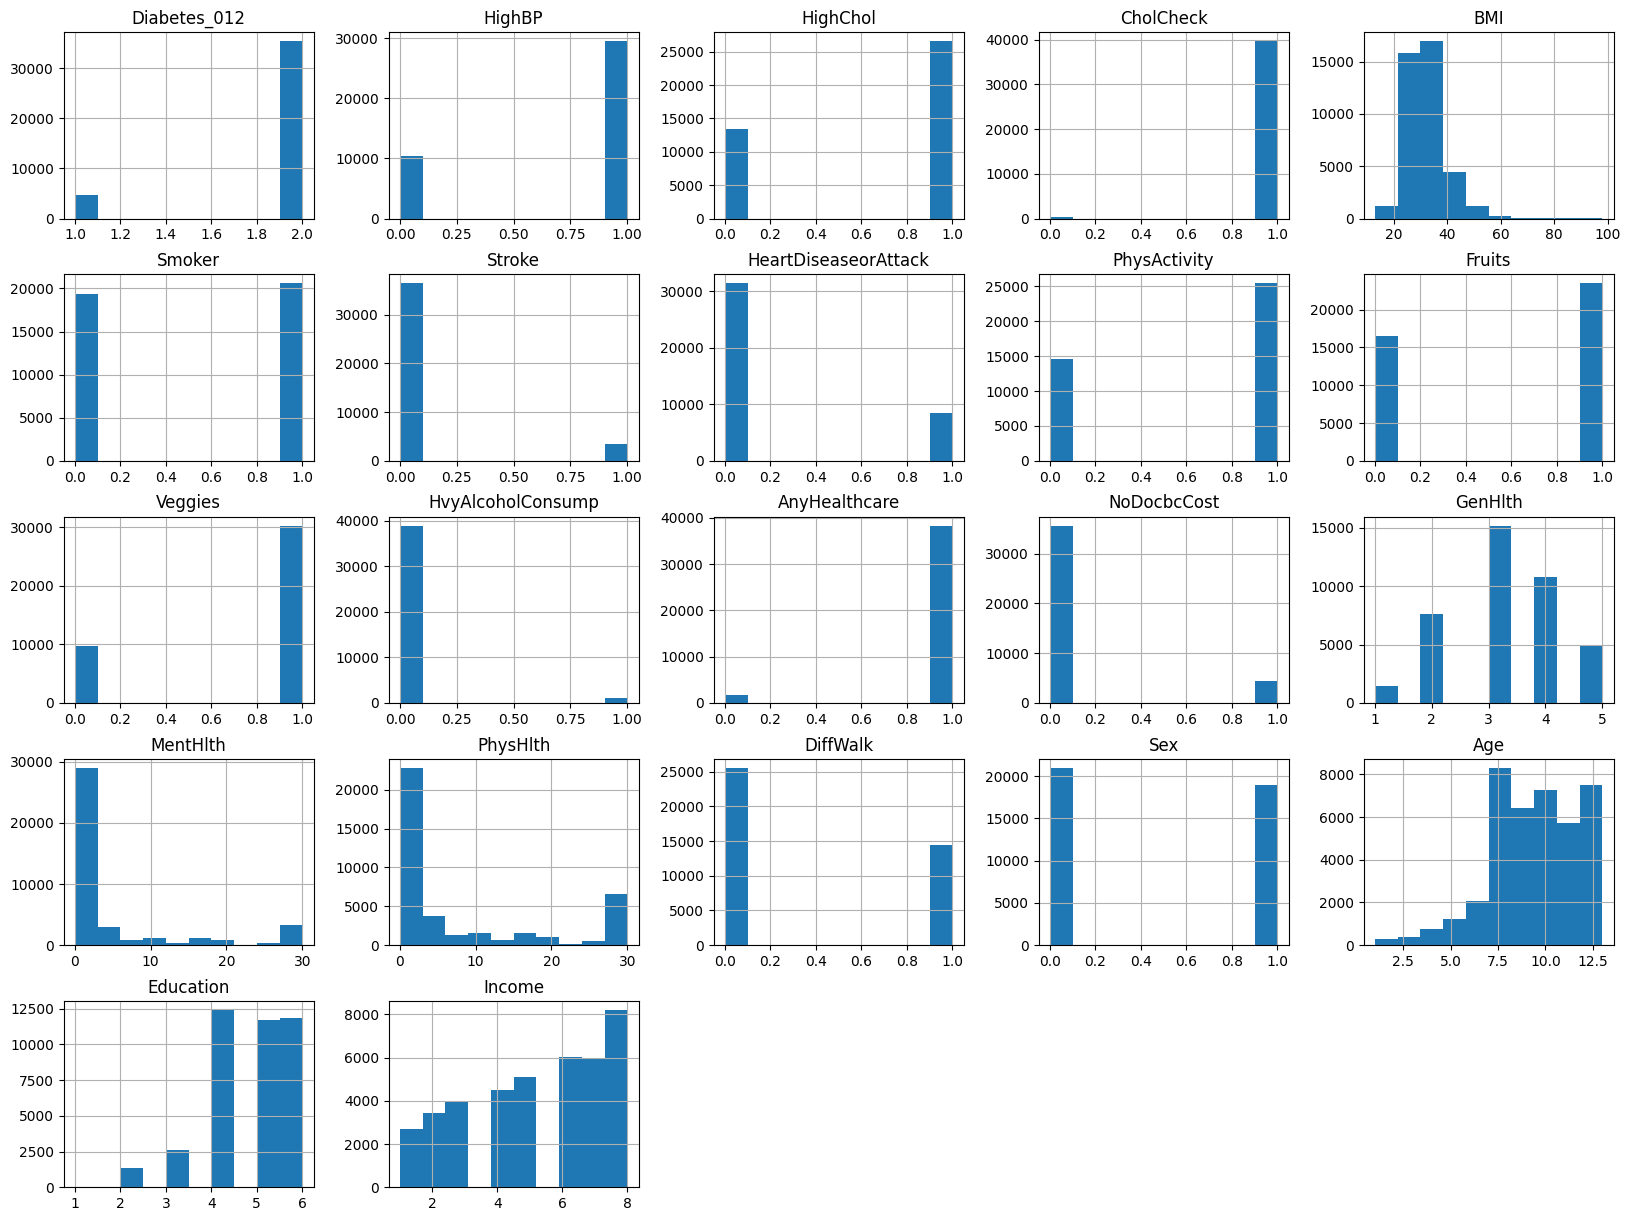

In [35]:
#data[data['Diabetes_012'].isin([1,2])].hist(figsize=(20,15))
# Osoby chore lub z podejrzeniem
diabetes_data = data[data['Diabetes_012'].isin([1,2])]
diabetes_data.hist(figsize=(20,15))

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

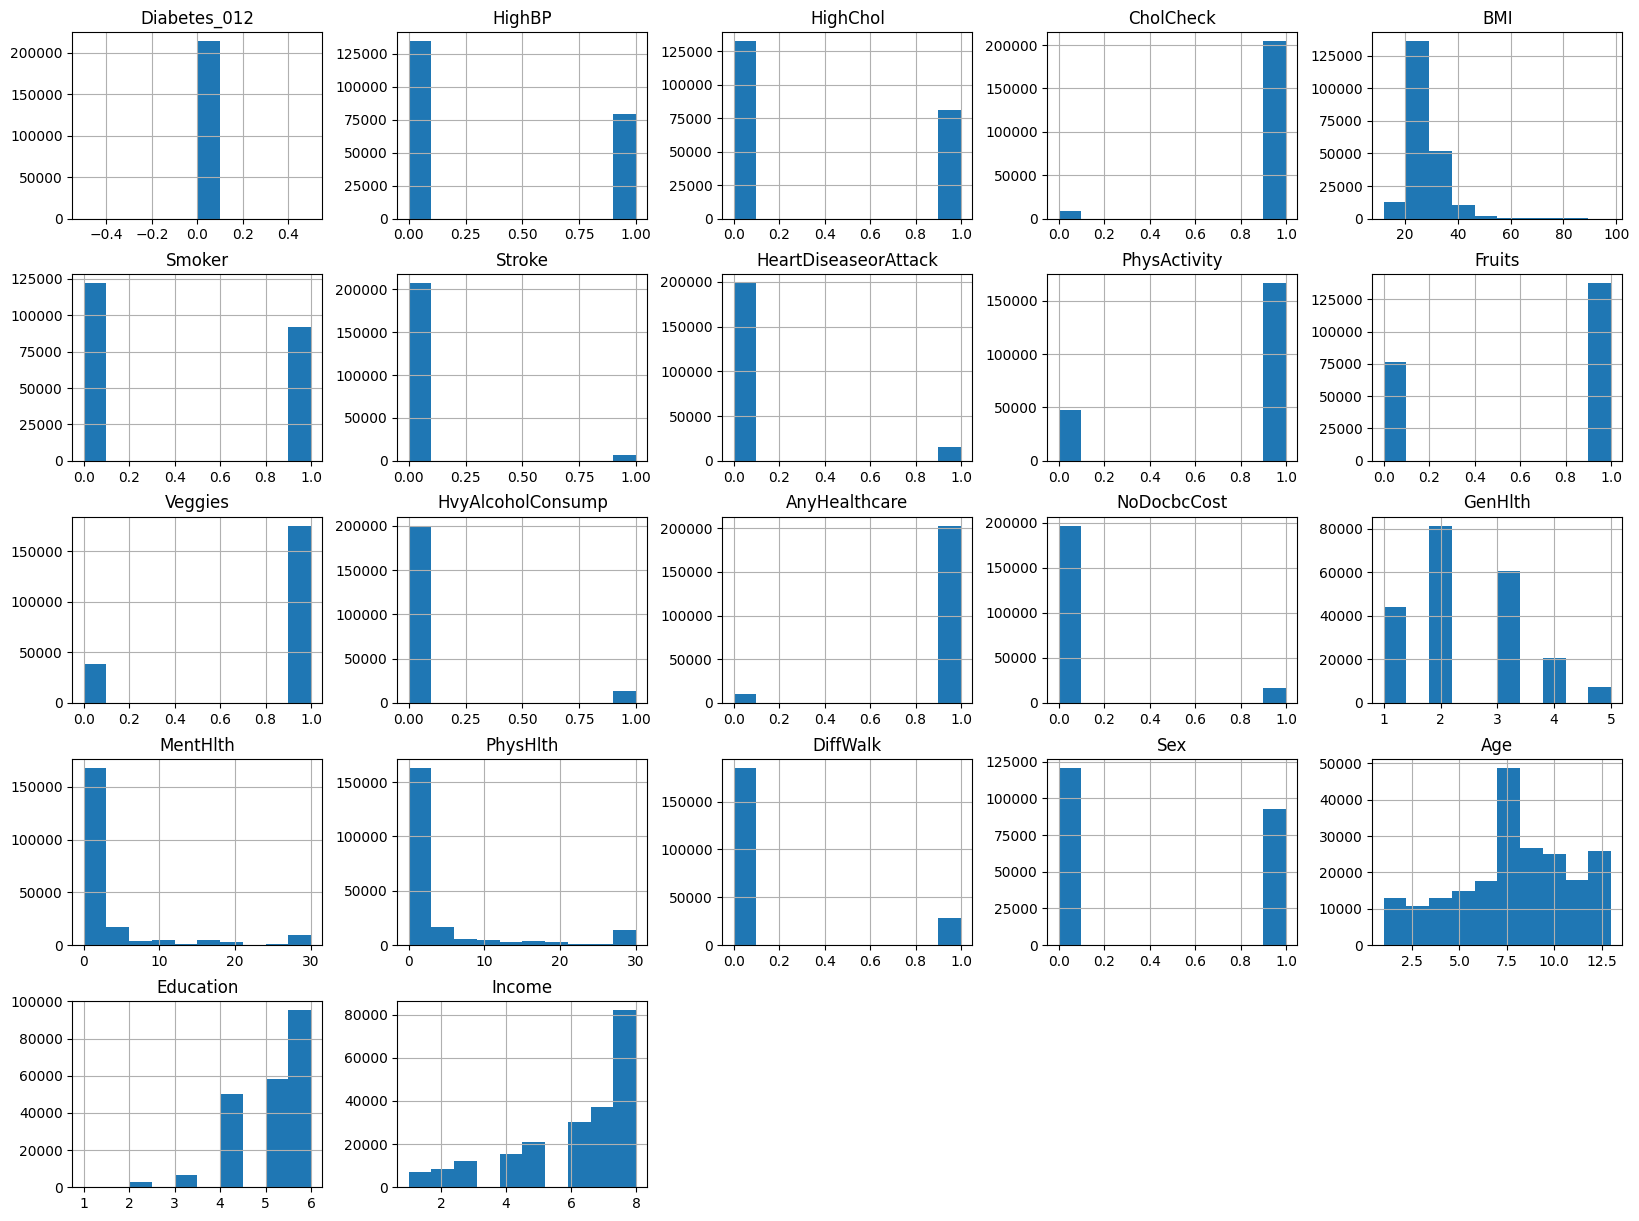

In [36]:
# Osoby zdrowe
diabetes_data = data[data['Diabetes_012'].isin([0])]
diabetes_data.hist(figsize=(20,15))

## Outliers 
Dotyczą głównie BMI, Zdrowia psychicznego i zdrowia fizycznego. W przypadku BMI mogą wynikać z błędów w danych, natomiast w przypadku MentHlth i PhysHlth prawdopodobnie są rzeczywistymi pomiarami, wynikającymi z subkietywnej oceny respondentów ankiet.

In [ ]:
# Tutaj Mati usuwając z kolumny BMI niepotrzebne ja się posłużyłem Med +/- 1.5 * IQR, ale 
# p. Małysz proponował użycie 95 i 5 centyla. IMO rozstęp lepszy.

/tmp/ipykernel_27529/2889213919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=col, data=data, ax=axs[i], palette="pastel")
/tmp/ipykernel_27529/2889213919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=col, data=data, ax=axs[i], palette="pastel")
/tmp/ipykernel_27529/2889213919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=col, data=data, ax=axs[i], palette="pastel")
/tmp/ipykernel_27529/2889213919.py:20: FutureWarning: 

Passing `palette` without assigning `hue`

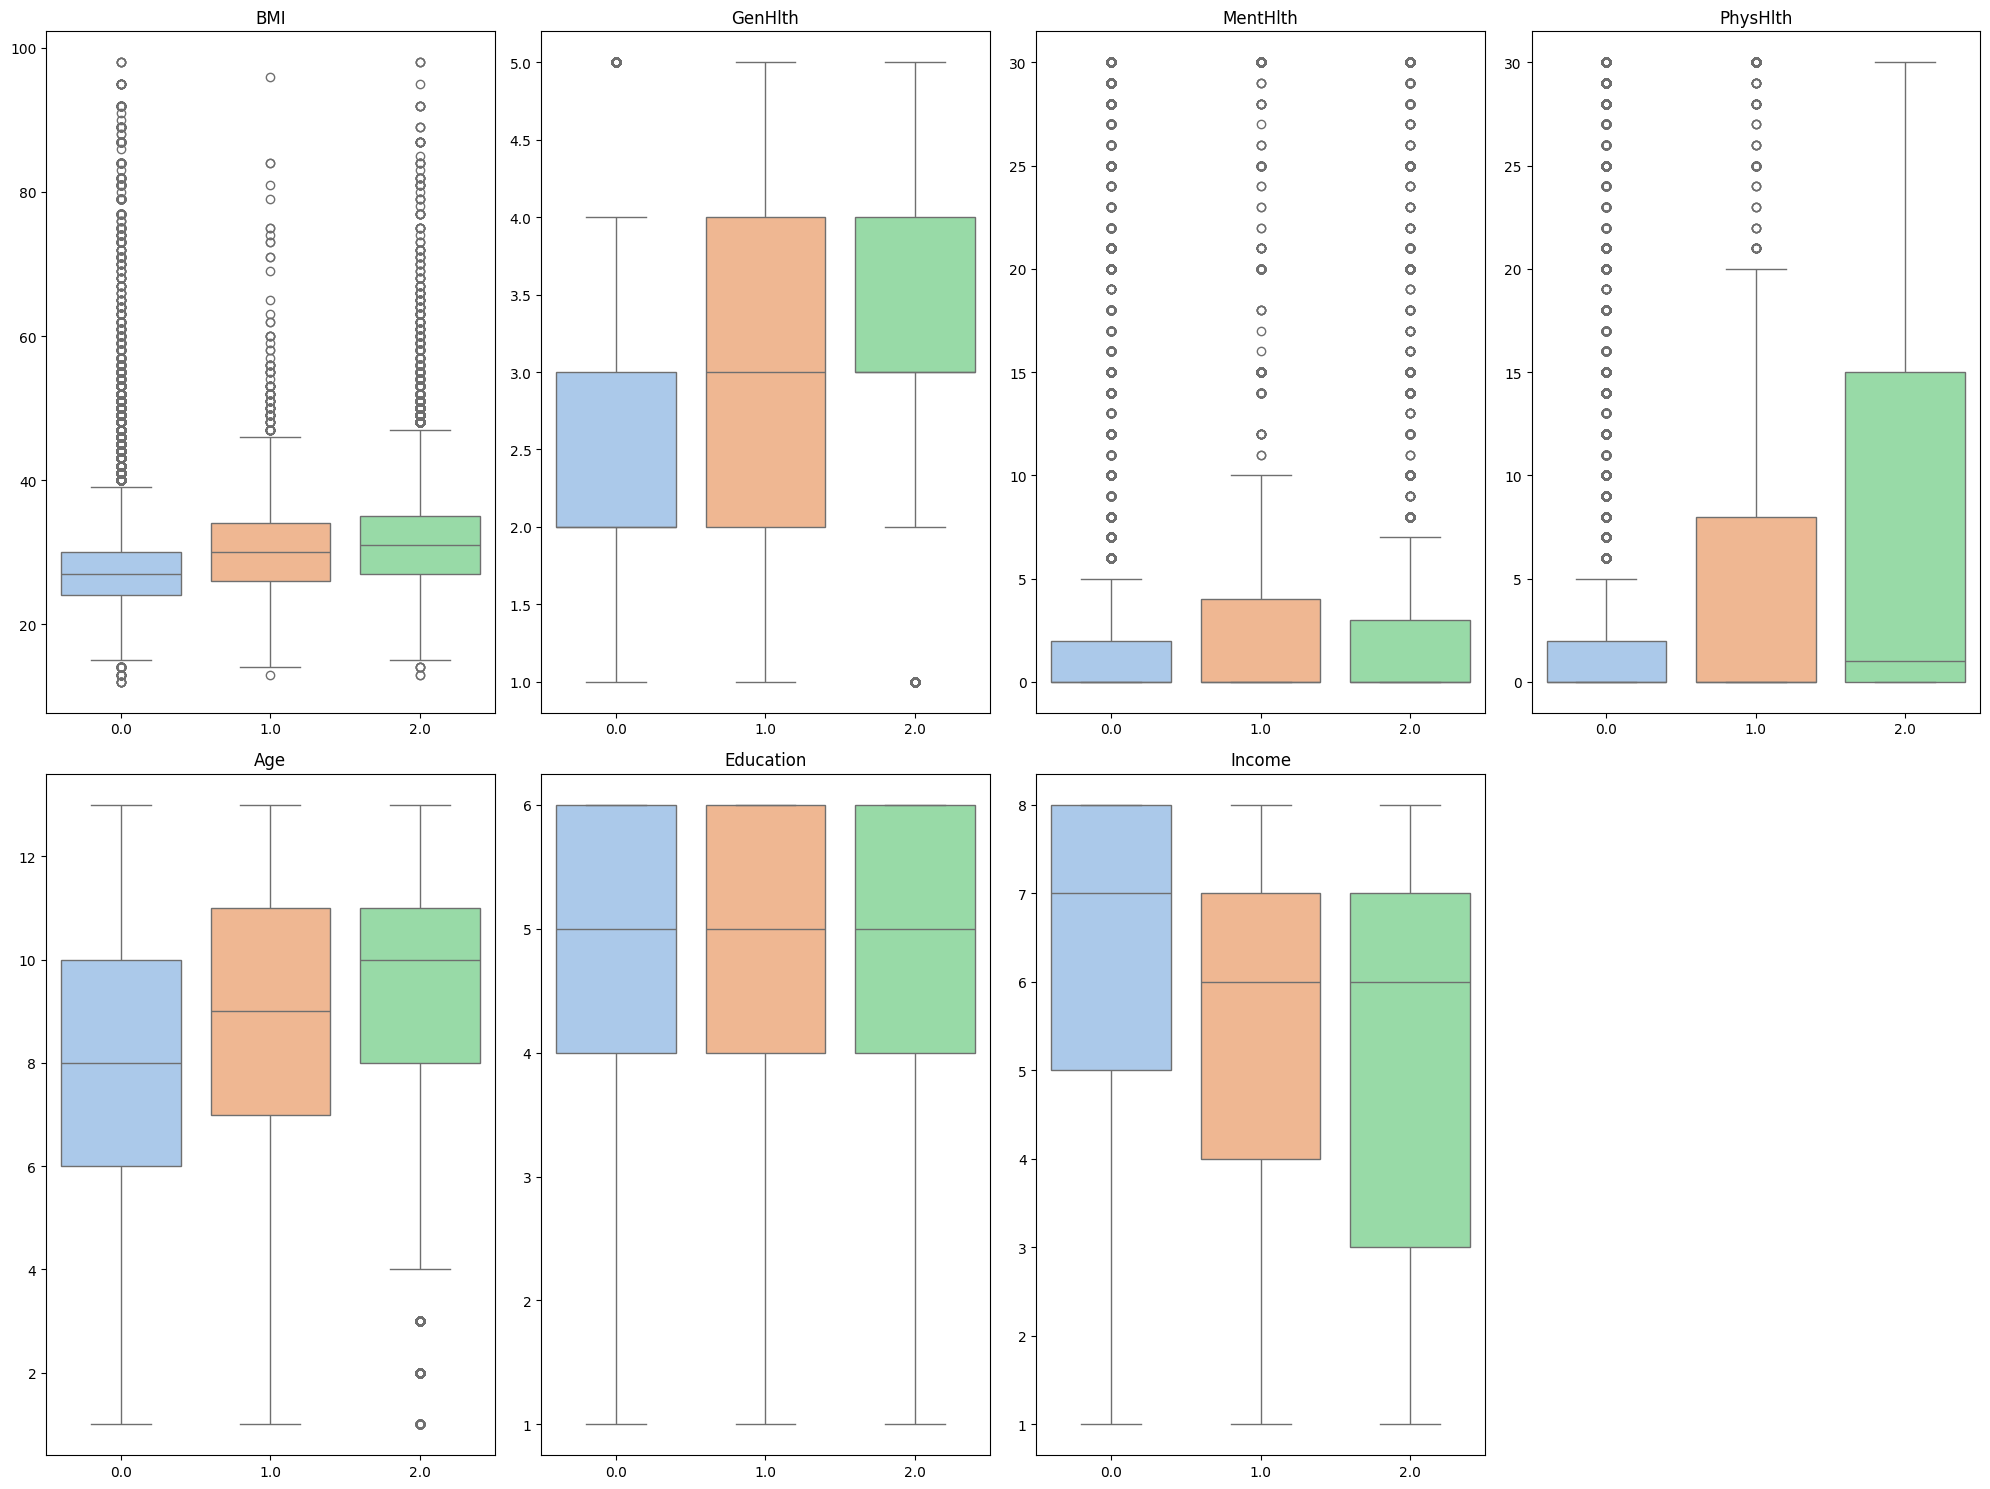

In [47]:
# Assuming 'data' is your DataFrame and it has a 'Diabetes_012' column

# Prepare the layout
columns_to_plot = [col for col in data.columns if data[col].nunique() > 2 and col != 'Diabetes_012']

# Prepare the layout based on filtered columns
n_vars = len(columns_to_plot)  # Number of columns to plot
n_cols = 4  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Calculate required number of rows

# Create the figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each variable
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x='Diabetes_012', y=col, data=data, ax=axs[i], palette="pastel")
    axs[i].set_title(col)  # Set the title to the column name
    axs[i].set_xlabel('')  # Clear the x-axis label to save space
    axs[i].set_ylabel('')  # Clear the y-axis label to save space

# Turn off any unused subplots
for i in range(n_vars, n_rows * n_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [48]:
columns_with_more_than_2_distinct_values = [col for col in data.columns if data[col].nunique() > 2]

# Initialize a set to hold the index of rows with outliers
outlier_indices = set()

# Step 2: Identify outliers for each of these columns
for col in columns_with_more_than_2_distinct_values:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the indices of rows containing outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    outlier_indices.update(outliers)

# Convert set to list if needed for further processing
outlier_indices_list = list(outlier_indices)

print(f"Identified {len(outlier_indices_list)} rows containing outliers.")

Identified 90731 rows containing outliers.


/tmp/ipykernel_27529/156294017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Diabetes_012', y='Values', col='Variables', data=long_df, kind='violin', col_wrap=4, sharey=False, palette='pastel', inner='quartile', height=5, aspect=1)


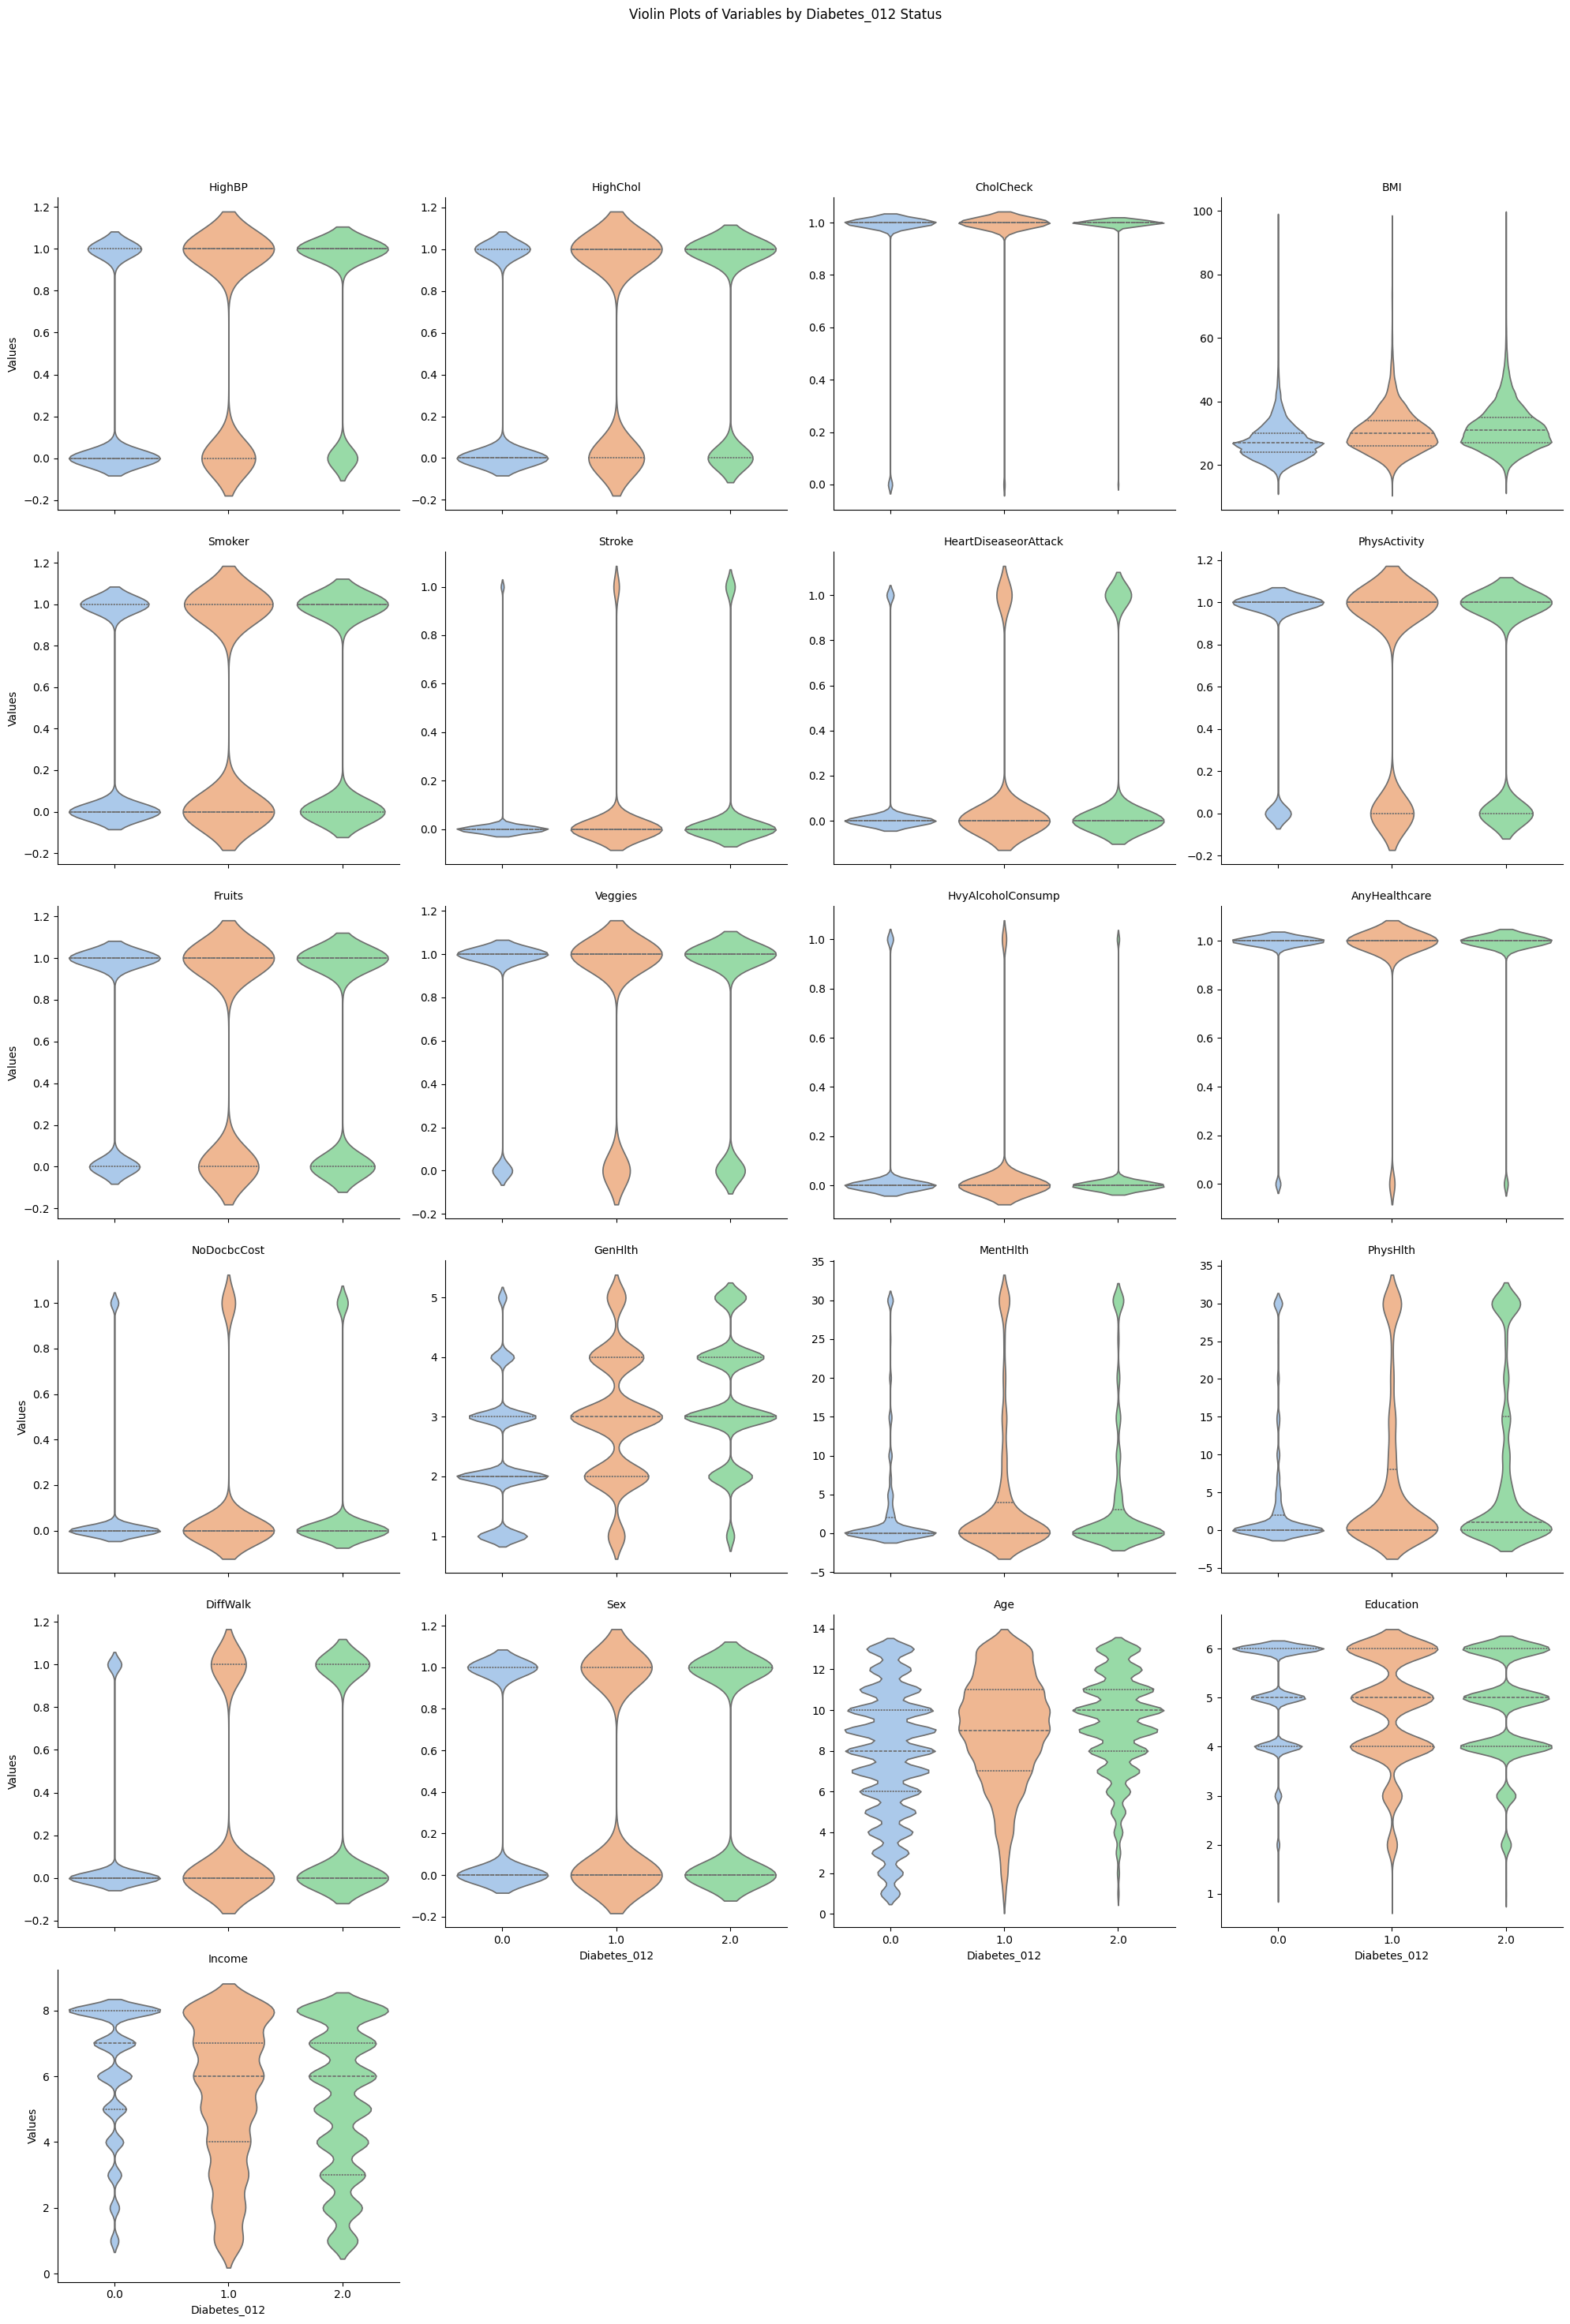

In [39]:
#instead of .hist make violin for every column
long_df = data.melt(id_vars='Diabetes_012', var_name='Variables', value_name='Values')

# Now, use seaborn's catplot to create violin plots for all variables, differentiated by 'Diabetes_012'.
g = sns.catplot(x='Diabetes_012', y='Values', col='Variables', data=long_df, kind='violin', col_wrap=4, sharey=False, palette='pastel', inner='quartile', height=5, aspect=1)

# Adjusting layout for better readability
g.set_titles('{col_name}')
g.set_axis_labels("Diabetes_012", "Values")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Violin Plots of Variables by Diabetes_012 Status')  # Adjust title as needed

plt.show()

## Korelacje
Spośród zmiennych objaśniających największą korelacją cechują się pary:
- Zdrowie fizyczne i zdrowie ogólne
- Zdrowie fizyczne/ ogólne i brak problemów z chodzeniem po schodach
- Zdrowie fizyczne i psychiczne
- Zdrowie ogólne i zarobki
- Zdrowie ogólne i aktywność sportowa
- Zdrowie ogólne i brak chorób serca
- Wiek i wysokie ciśnienie krwi/ wysoki cholesterol
- Wykształcenie i zarobki


Ze zmienną celu najsilniej skorelowane są:
- Wysokie ciśnienie
- Wysoki cholesterol
- BMI
- Zdrowie ogólne
- Trudności z chodzeniem po schodach
- Wiek

Text(0.5, 1.0, 'Correlation matrix for diabetes features, including target')

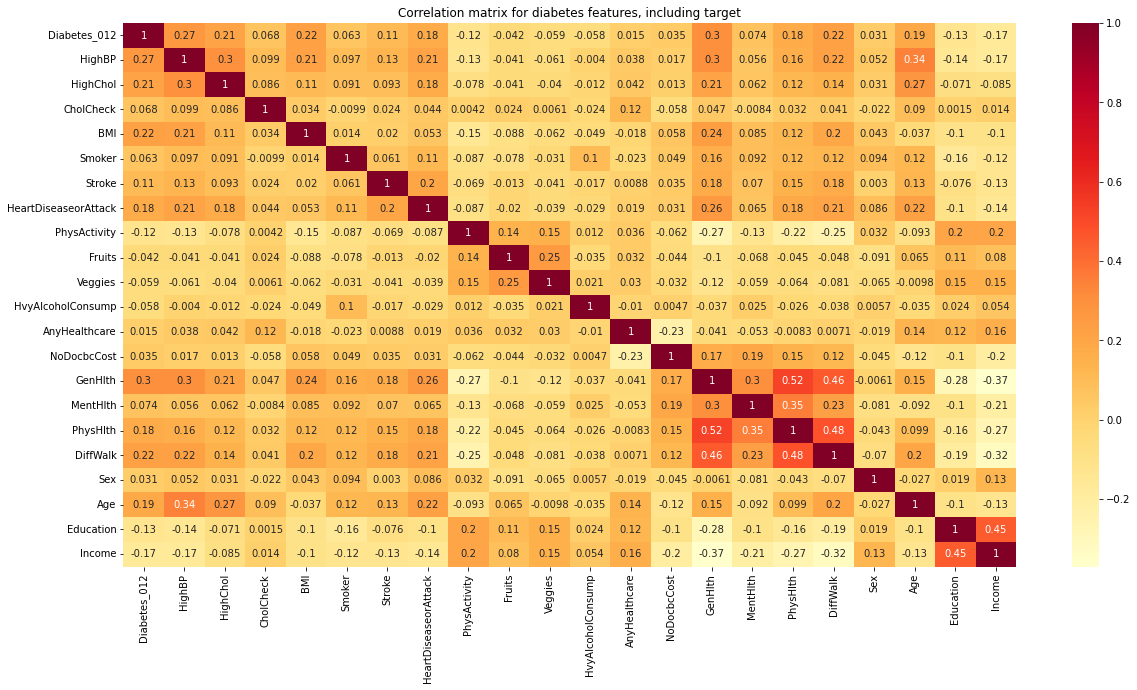

In [122]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True , cmap ='YlOrRd' )
plt.title("Correlation matrix for diabetes features, including target")

## Typy zmiennych
Zgodnie z opisem danych, większość cech jest kodowana binarnie (0/1). Te które nie są kodowane binarnie są w większości zmiennymi kategorycznymi uporządkowanymi, tzn. nie ma nieintuicyjnego mapowania kategorii na liczby. W tej części typy danych i ich wartości zostaną jeszcze raz szczegółowo zweryfikowane.

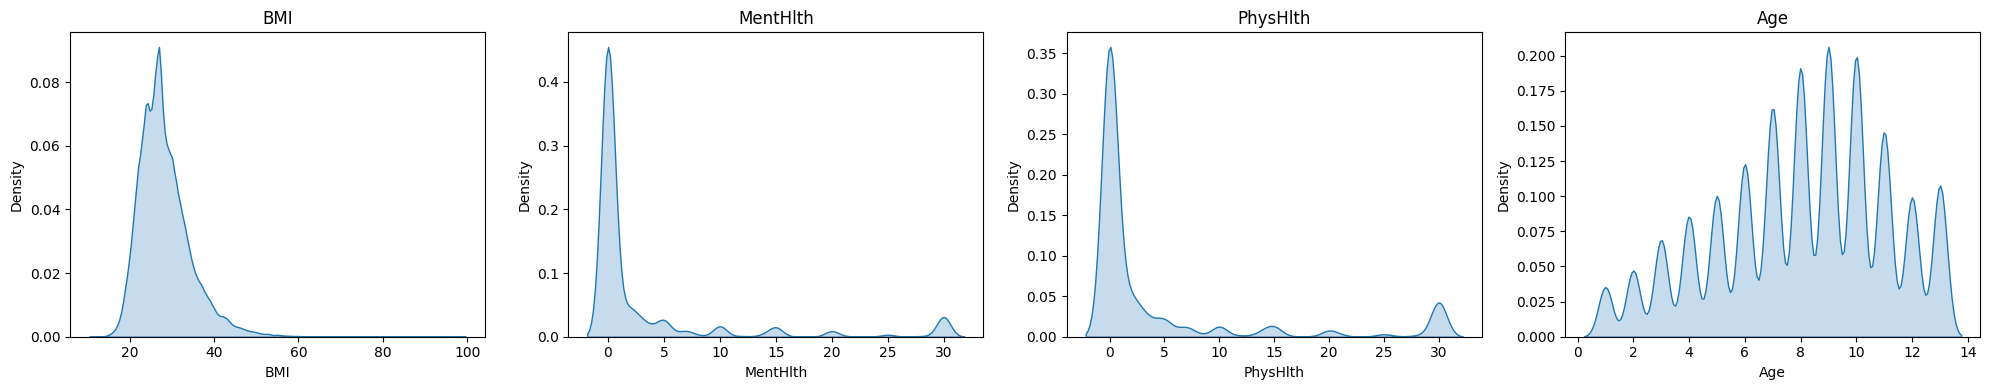

In [51]:
# Rozkłady zmiennnych mających więcej niż 10 unikalnych wartości:
# Jak widać zmienną BMI może można traktować jako ciągłą, resztę nie bardzo
# Filter columns with more than 10 distinct values
columns_with_more_than_10_distinct_values = [col for col in data.columns if data[col].nunique() > 10]

# Determine the layout for the plots
n_vars = len(columns_with_more_than_10_distinct_values)  # Number of variables to plot
n_cols = 4  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Number of rows in the grid

# Create the figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust height dynamically based on rows
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot KDE for each variable
for i, col in enumerate(columns_with_more_than_10_distinct_values):
    sns.kdeplot(data=data, x=col, ax=axs[i], fill=True)
    axs[i].set_title(col)  # Set the title to the column name

# Turn off any unused subplots
for i in range(n_vars, n_rows * n_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


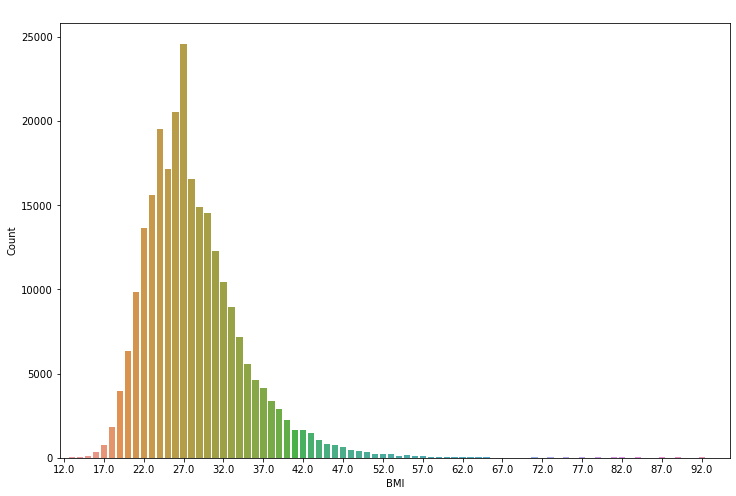

In [296]:
# Czy BMI traktować jako zmienną kategoryczną czy ciągłą?
bmi = np.sort(data['BMI'].unique()) # Wygląda na to, że bmi jest typu INT, w zakresie od 12 do 98
bmi_counts = data['BMI'].value_counts().to_frame().reset_index()
bmi_counts = bmi_counts.rename(columns={"index":"bmi", "BMI":"count"})
bmi_counts = bmi_counts.sort_values("bmi").reset_index()["count"]


plt.figure(figsize = (12,8))
ax = sns.barplot(x=bmi, y=bmi_counts)
ax.set(xlabel = "BMI", ylabel = "Count", title = "Counts of each BMI value")
ax.set_title(label = "Counts of each BMI value", fontdict = {"color":"white"})
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

## Badanie zbalansowania datasetu
Ze względu na zmienną celu (Diabetes_012): jedynie **1.8%** osób ma podejrzenie choroby (lub stan przedcukrzycowy), a około **14%** jest chorych, zatem **84%** osób jest zdrowych. Konieczne będzie zastosowanie stratyfikacji przy podziale zbioru danych.   
  
Z kolei w zmiennych PhysHlth i MentHlth wiele wartości występuje tylko w małym ułamku wierszy (rzędu **0,01%**), co nie pozwala na dokładną predykcję, dlatego podczas inżynierii cech należałoby pogrupować odpowiedzi respondentów w przedziały. (binning)


In [205]:
# Obliczanie liczności poszczególnych kategorii
diabetes_counts = data['Diabetes_012'].value_counts()
diabetes_sorted_counts = diabetes_counts.reindex([0.0, 1.0, 2.0])

# Obliczanie częstości występowania każdej kategorii
diabetes_fraction = diabetes_counts / diabetes_counts.sum() * 100

# Tworzenie ramki danych z wynikami
diabetes_matrix = pd.DataFrame({'Counts': diabetes_counts.values, 'Fraction (%)': diabetes_fraction.values}, index=diabetes_counts.index)
diabetes_matrix = diabetes_matrix.sort_index()

# Wyświetlenie macierzy
diabetes_matrix

,Counts,Fraction (%)
0.0,213703,84.241170
1.0,4631,1.825528
2.0,35346,13.933302


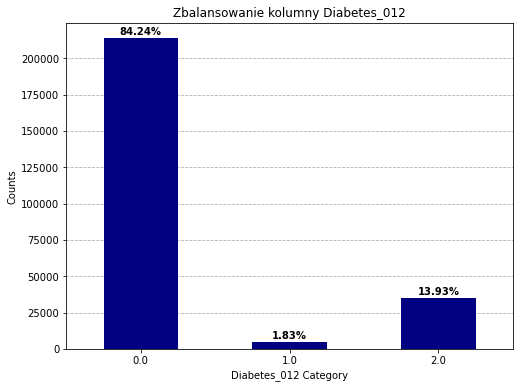

In [211]:
# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
ax = diabetes_sorted_counts.plot(kind='bar', color="navy", zorder = 2)

# Dodanie wartości procentowych
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(data) * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()+1000), 
                ha='center', va='center', fontsize=10, color='black', weight="semibold", xytext=(0, 5), 
                textcoords='offset points')
    
plt.title('Zbalansowanie kolumny Diabetes_012')
plt.xlabel('Diabetes_012 Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Obrót etykiet osi X
ax.grid(axis = "y", zorder=1, linestyle="--")
plt.show()

### Porównanie z wartościami szacunkowymi dla całej populacji:
Świat: 10.5% chorych na cukrzycę i drugie tyle w stanie przedcukrzycowym

USA: 11.6% chorych na cukrzycę


In [225]:
from scipy.stats import binomtest
# binomtest(observed successes, n, p - pstwo z całej populacji, greater/less)
res = binomtest(35346, 253680, 0.116, 'less')
res.pvalue
# Zakładając, że liczbę osób z cukrzycą można modelować rozkładem dwumianowym z pstwem
# choroby równym 0.116 (wartość dla USA), jakie jest prawdopodobieństwo że zaobserwujemy 35346
# lub mniej osób z cukrzycą?

0.6873098841824477

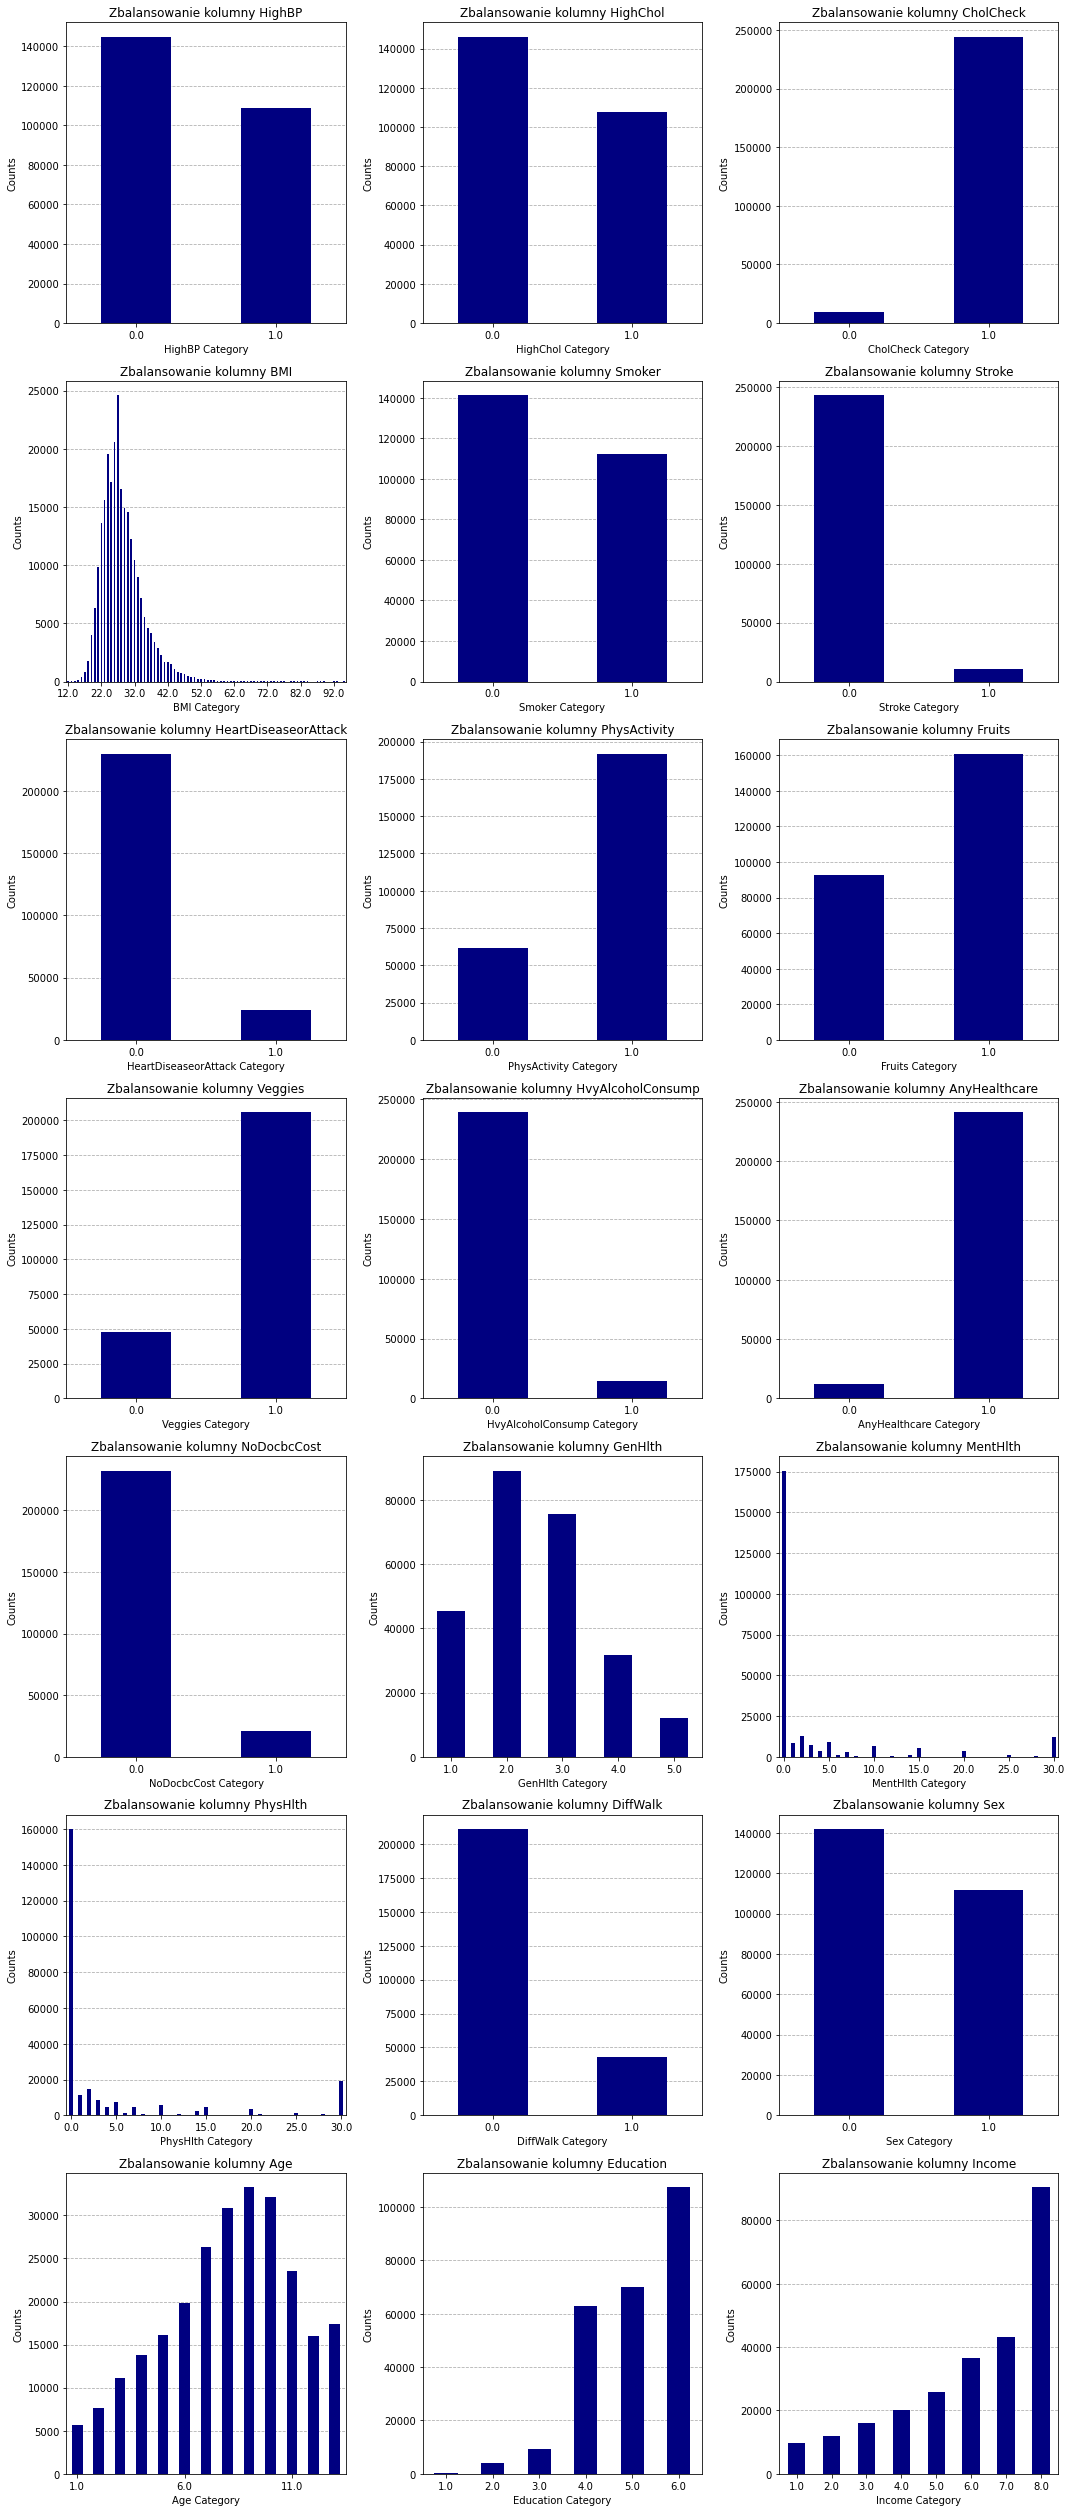

In [179]:
results = []

# Iteracja przez każdą kolumnę w ramce danych (bez 'Diabetes_012')
for column in data.columns:
     
    if column == 'Diabetes_012':
        continue
    
    # Obliczanie liczności poszczególnych kategorii
    column_counts = data[column].value_counts()
    
    # Obliczanie częstości występowania każdej kategorii
    column_fraction = column_counts / column_counts.sum()
    
    # Dodanie wyników do listy
    results.append((column, column_counts, column_fraction))

# Ustalenie liczby wierszy i kolumn w siatce wykresów
num_plots = len(results)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Utworzenie siatki wykresów
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

# Iteracja przez wyniki i tworzenie wykresów słupkowych dla każdej kolumny
for i, (column, counts, fraction) in enumerate(results):
    ax = axes[i // num_cols, i % num_cols]  # Uzyskanie odpowiedniego podwykresu
    
    # Sortowanie wartości w kolumnie i obliczanie ich częstości
    sorted_values = sorted(counts.index)
    sorted_counts = counts.reindex(sorted_values)
    
    # Tworzenie wykresu słupkowego z uporządkowanymi wartościami
    sorted_counts.plot(kind='bar', ax=ax, color="navy", zorder=2)
    ax.set_title(f'Zbalansowanie kolumny {column}')
    ax.set_xlabel(f'{column} Category')
    ax.set_ylabel('Counts')
    ax.grid(axis='y', linestyle='--', zorder=1)  # Dodanie siatki
    
    # Próba ulepszenia tickmarks na osiach X
    if len(counts) > 10:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    if len(counts) > 31:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.tick_params(rotation = 0)
    
# Usunięcie niepotrzebnych pustych podwykresów
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Wyświetlenie siatki wykresów
plt.tight_layout()
plt.show()

In [180]:
# Kolumny w których wartość najrzadziej występująca występuje mniej niż w 5% wierszy
# Ustalenie progu dla niezbalansowania
threshold = 0.05

# Inicjalizacja listy do przechowywania nazw niezbalansowanych kolumn
unbalanced_columns = []

# Iteracja przez wyniki
for column, counts, fraction in results:
    # Nie bierzemy pod uwagę kolumn które mają więcej niż 10 unikalnych wartości
    if len(counts) > 10:
        continue
    # Sprawdzenie czy najmniejsza częstość występowania kategorii jest mniejsza niż próg
    if fraction.min() < threshold:
        unbalanced_columns.append(column)

# Wyświetlenie niezbalansowanych kolumn
print("Niezbalansowane kolumny:")
for column in unbalanced_columns:
    print(column)
    
# Wśród tych kolumn szczególnie GenHlth jest silnie związany z ryzykiem cukrzycy,
# co warto wziąć pod uwagę przy ostatecznym podziale

Niezbalansowane kolumny:
CholCheck
Stroke
AnyHealthcare
GenHlth
Education
Income


In [192]:
# PhysHlth i MentHlth:
P_M_results = []

for column, counts, fraction in results:
    if column == 'PhysHlth' or column == 'MentHlth':
        P_M_results.append((column, counts, fraction))

df_mental_counts = pd.DataFrame({
    'MentHlth': P_M_results[0][1].index,
    'Counts': P_M_results[0][1].values,
    'Fraction (%)': P_M_results[0][2].values *100
}).sort_values('MentHlth').reset_index(drop = True)

df_mental_counts

,MentHlth,Counts,Fraction (%)
0,0.0,175680,69.252602
1,1.0,8538,3.365658
2,2.0,13054,5.145853
3,3.0,7381,2.909571
4,4.0,3789,1.493614
5,5.0,9030,3.559603
6,6.0,988,0.389467
7,7.0,3100,1.222012
8,8.0,639,0.251892
9,9.0,91,0.035872


In [193]:
df_phys_counts = pd.DataFrame({
    'PhysHlth': P_M_results[1][1].index,
    'Counts': P_M_results[1][1].values,
    'Fraction (%)': P_M_results[1][2].values *100
}).sort_values('PhysHlth').reset_index(drop = True)

df_phys_counts

,PhysHlth,Counts,Fraction (%)
0,0.0,160052,63.092085
1,1.0,11388,4.489120
2,2.0,14764,5.819931
3,3.0,8495,3.348707
4,4.0,4542,1.790445
5,5.0,7622,3.004573
6,6.0,1330,0.524283
7,7.0,4538,1.788868
8,8.0,809,0.318906
9,9.0,179,0.070561


## Hipotezy zależności:

1. Na zmienną celu będą miały duży wpływ cechy związane ze zdrowiem fizycznym, takie jak zdrowie fizyczne, sport, BMI.
2. Zmienne pozazdrowotne będą miały mały wpływ, np. wiek, zarobki, edukacja, płeć.
3. Zarobki i edukacja są silnie skorelowane.
4. Pomiędzy niektórymi cechami mogą wystąpić zależności, szczególnie: poziom cholesterolu i ataki serca, poziom zdrowia mentalnego i silne uzależnienie od alkoholu.

## Badanie korelacji zmiennych i ich wpływu na ryzyko cukrzycy

Text(0.5, 1.0, 'Correlation matrix (spearman) for diabetes features, including target')

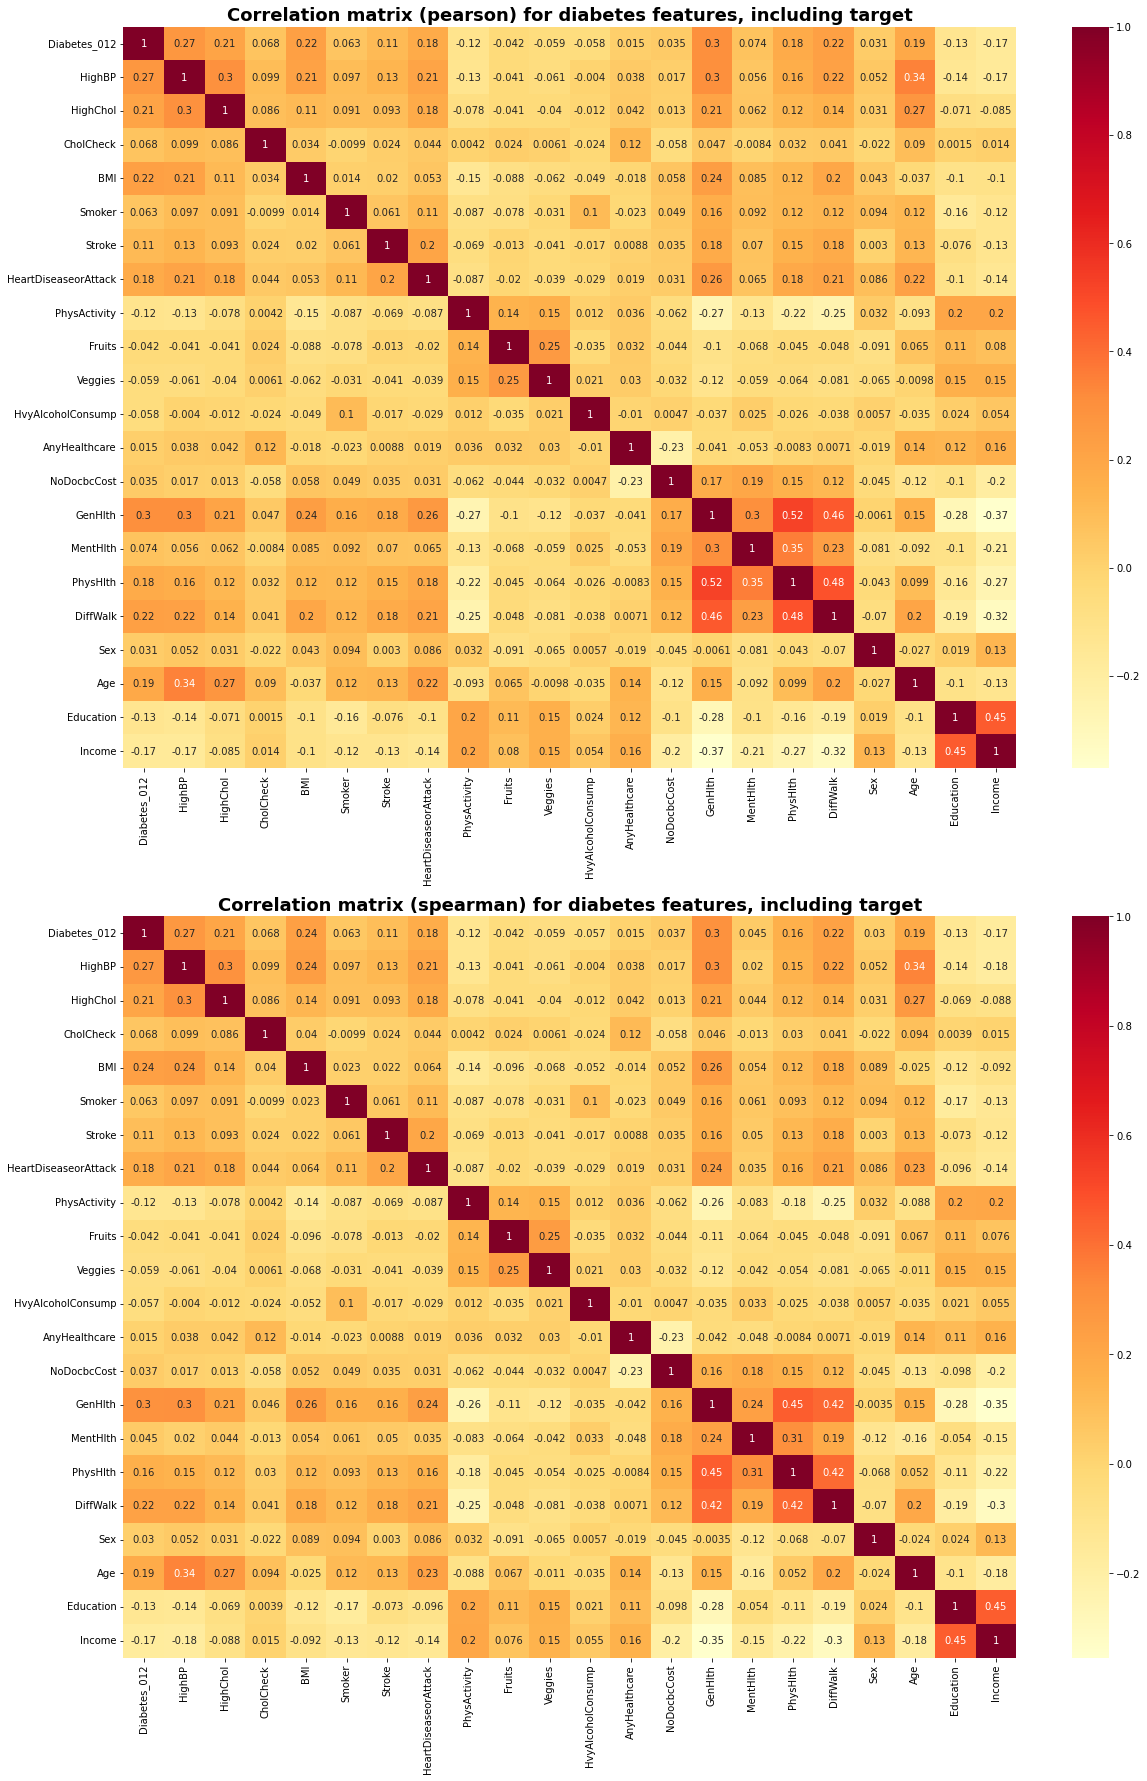

In [244]:
fig, axes = plt.subplots(2, 1, figsize = (20,30))
ax1 = axes[0]
sns.heatmap(data.corr(method="pearson"), annot=True , cmap ='YlOrRd', ax = ax1)
ax1.set_title("Correlation matrix (pearson) for diabetes features, including target",
             fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })

ax2 = axes[1]
sns.heatmap(data.corr(method="spearman"), annot=True , cmap ='YlOrRd', ax = ax2)
ax2.set_title("Correlation matrix (spearman) for diabetes features, including target",
              fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })

BMI vs. General Health, Diabetes

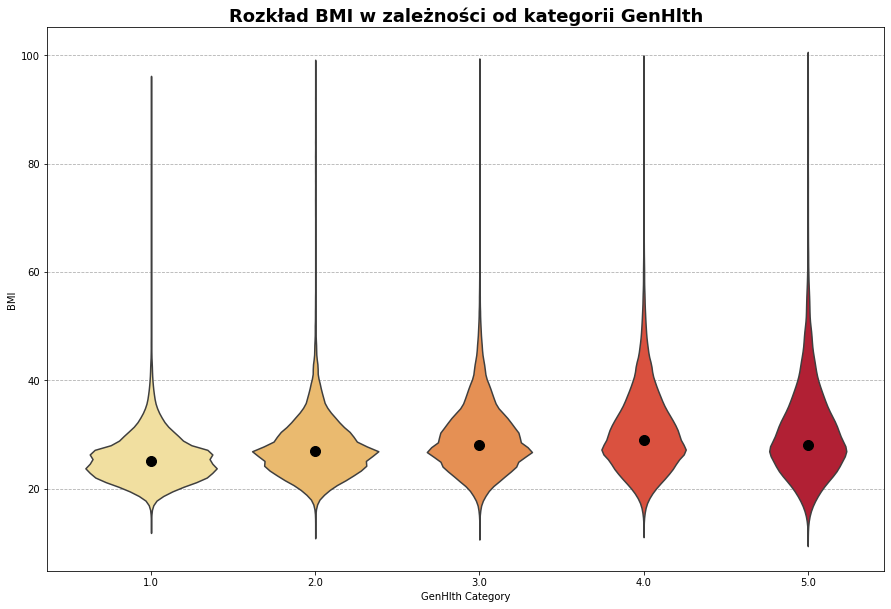

In [294]:
medians = filtered_data.groupby('GenHlth')['BMI'].median()

# Tworzenie wykresu skrzypcowego dla pary GenHlth i BMI
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='GenHlth', y='BMI', data=data, palette='YlOrRd', inner= None, zorder = 2)
plt.scatter(x=medians.index-1, y=medians.values, color='black', marker='o', s=100, zorder=3)  # Dorysowanie median
plt.title('Rozkład BMI w zależności od kategorii GenHlth', fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })
plt.xlabel('GenHlth Category')
plt.ylabel('BMI')
ax.set_axisbelow(True)
plt.grid(axis='y', zorder = 1, linestyle='--')  

In [247]:
# Obliczenie kwantyli dla kolumny BMI
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)

# Obliczenie IQR
IQR = Q3 - Q1

# Definiowanie dolnego i górnego limitu odcięcia
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Odfiltrowanie wartości odstających z kolumny BMI
filtered_data = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]

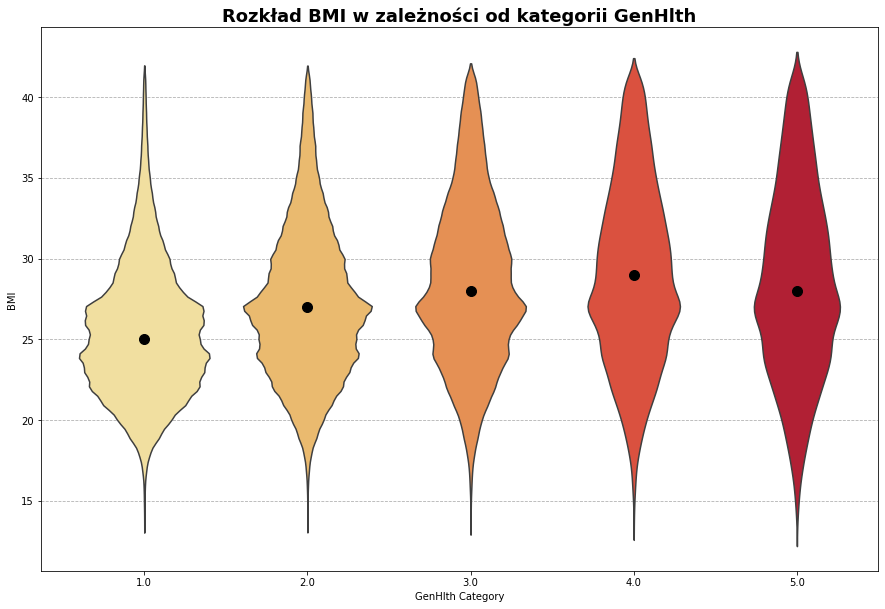

In [293]:
medians = filtered_data.groupby('GenHlth')['BMI'].median()

# Tworzenie wykresu skrzypcowego dla pary GenHlth i BMI po odfiltrowaniu outlierów
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='GenHlth', y='BMI', data=filtered_data, palette='YlOrRd', inner=None, zorder = 2)
plt.scatter(x=medians.index-1, y=medians.values, color='black', marker='o', s=100, zorder=3)  # Dorysowanie median
plt.title('Rozkład BMI w zależności od kategorii GenHlth', fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })
plt.xlabel('GenHlth Category')
plt.ylabel('BMI')
ax.set_axisbelow(True)
plt.grid(axis='y', zorder = 1, linestyle='--')  
plt.show()

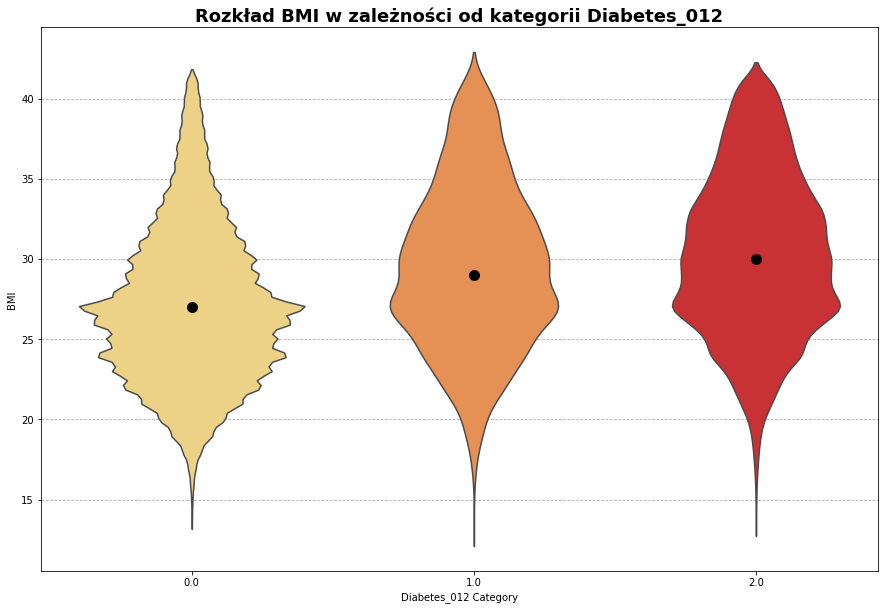

In [295]:
# BMI vs Diabetes ( już po odfiltrowaniu outlierów z kolumny BMI )
medians = filtered_data.groupby('Diabetes_012')['BMI'].median()

# Tworzenie wykresu skrzypcowego dla pary diabetes i BMI po odfiltrowaniu outlierów
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='Diabetes_012', y='BMI', data=filtered_data, palette='YlOrRd', inner=None)
plt.scatter(x=medians.index, y=medians.values, color='black', marker='o', s=100, zorder=3)  # Dorysowanie median   
plt.title('Rozkład BMI w zależności od kategorii Diabetes_012', fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })
plt.xlabel('Diabetes_012 Category')
plt.ylabel('BMI')
ax.set_axisbelow(True)
plt.grid(axis='y', zorder = 1, linestyle='--')  
plt.show()

Zdrowie fizyczne vs problemy z chodzeniem

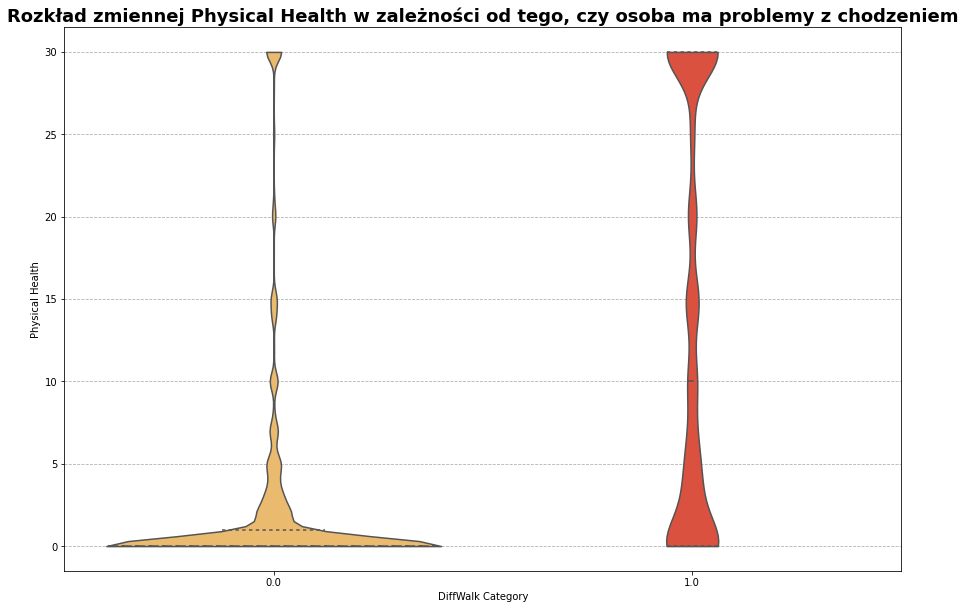

In [307]:
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='DiffWalk', y='PhysHlth', data=data, palette='YlOrRd', inner = None, cut = 0 ) 
plt.title('Rozkład zmiennej Physical Health w zależności od tego, czy osoba ma problemy z chodzeniem', fontdict = {
                     'fontsize': 18,
                     'fontweight' : "semibold"
              })
plt.xlabel('DiffWalk Category')
plt.ylabel('Physical Health')
ax.set_axisbelow(True)
plt.grid(axis='y', zorder = 1, linestyle='--')  
plt.show()

### Macierze kontyngencji dla zmiennych kategorycznych

In [317]:
# Generowanie macierzy kontyngencji dla kolumn Diabetes_012 i HighBP
observed_contingency_matrix = pd.crosstab(data['Diabetes_012'], data['HighBP'])

In [318]:
# Wygenerowanie przewidywanej macierzy kontyngencji dla niezależności zmiennych
expected_contingency_matrix = pd.DataFrame(chi2_contingency(observed_contingency_matrix)[3], 
                                           index=observed_contingency_matrix.index,
                                           columns=observed_contingency_matrix.columns).round().astype(int)

In [319]:
display("Expected", expected_contingency_matrix)
display("Observed", observed_contingency_matrix)

'Expected'

HighBP,0.0,1.0
Diabetes_012,,
0.0,122024,91679
1.0,2644,1987
2.0,20183,15163


'Observed'

HighBP,0.0,1.0
Diabetes_012,,
0.0,134391,79312
1.0,1718,2913
2.0,8742,26604


In [320]:
# Generowanie macierzy kontyngencji dla kolumn Diabetes_012 i HighChol
observed_contingency_matrix = pd.crosstab(data['Diabetes_012'], data['HighChol'])

In [321]:
# Wygenerowanie przewidywanej macierzy kontyngencji dla niezależności zmiennych
expected_contingency_matrix = pd.DataFrame(chi2_contingency(observed_contingency_matrix)[3], 
                                           index=observed_contingency_matrix.index,
                                           columns=observed_contingency_matrix.columns).round().astype(int)

In [322]:
display("Expected", expected_contingency_matrix)
display("Observed", observed_contingency_matrix)

'Expected'

HighChol,0.0,1.0
Diabetes_012,,
0.0,123067,90636
1.0,2667,1964
2.0,20355,14991


'Observed'

HighChol,0.0,1.0
Diabetes_012,,
0.0,132673,81030
1.0,1756,2875
2.0,11660,23686
